In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
sns.set()

In [106]:
import scipy

In [107]:
from scipy import stats

In [7]:
data = pd.read_csv('/Users/kirstenk/Documents/She Codes/Project/master.csv')

# Exploring data

In [8]:
print(data.head())

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

In [9]:
print(data.tail())

          country  year     sex          age  suicides_no  population  \
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
27815               2.96  Uzbekistan2014         0.675     63,067,077,179   
27816               2.58  Uzbekistan2014         0.675     63,067,077,179   
27817               2.17  Uzbekistan2014         0.675     63,067,077,179   
27818               1.67  Uzbekistan2014         0.675     63,067,077,179   
27819               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)    generation  
27815                2309  Generation X  
27816         

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# HDI Column

In [11]:
# From which year on is the HDI collected for our dataset?

In [12]:
hdi_year = data.groupby('year')['HDI for year'].count()
hdi_year

year
1985     444
1986       0
1987       0
1988       0
1989       0
1990     600
1991       0
1992       0
1993       0
1994       0
1995     756
1996       0
1997       0
1998       0
1999       0
2000     912
2001       0
2002       0
2003       0
2004       0
2005     912
2006       0
2007       0
2008       0
2009       0
2010    1008
2011     972
2012     936
2013     924
2014     900
2015       0
2016       0
Name: HDI for year, dtype: int64

# Countries

In [13]:
country = data.country.unique()

In [14]:
country

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [15]:
len(country)

101

# Generations

In [16]:
generation = data.generation.unique()

In [17]:
generation

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

# Age Groups

In [18]:
age = data.age.unique()
age.tolist()
age.sort()
age

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [19]:
len(age)

6

## Suicide numbers by age groups

In [20]:
suicide_byage = data.groupby('age')['suicides_no'].mean()
suicide_byage.to_frame()
suicide_byage = suicide_byage.reset_index()


equiv = {'5-14 years':'1', '15-24 years':'2', '25-34 years': '3', '35-54 years': '4', '55-74 years': '5',
                  '75+ years': '6'}
suicide_byage['age group'] = suicide_byage['age'].map(equiv)
suicide_byage = suicide_byage.sort_values('age group')
suicide_byage

,age,suicides_no,age group
3,5-14 years,11.337093,1
0,15-24 years,174.179664,2
1,25-34 years,242.118053,3
2,35-54 years,528.250969,4
4,55-74 years,357.269065,5
5,75+ years,140.697544,6


Text(0, 0.5, 'Suicide No')

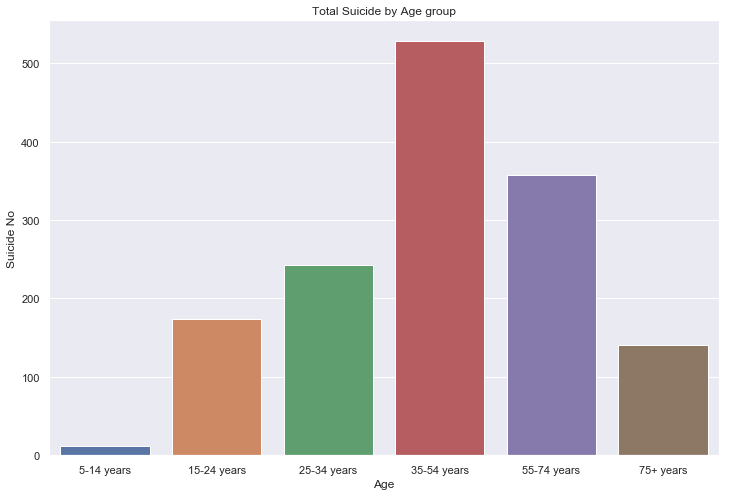

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x='age', y='suicides_no', data=suicide_byage)
plt.title("Total Suicide by Age group")
plt.xlabel("Age")
plt.ylabel("Suicide No")

## Suicide rate by age

In [23]:
srate_byage = data.groupby('age')['suicides/100k pop'].mean()
srate_byage.to_frame()
srate_byage = srate_byage.reset_index()

equiv = {'5-14 years':'05-14 years', '15-24 years':'15-24 years', '25-34 years': '25-34 years', '35-54 years': '35-54 years', '55-74 years': '55-74 years',
                  '75+ years': '75+ years'}
srate_byage['age group'] = srate_byage['age'].map(equiv)
srate_byage = srate_byage.sort_values('age group')
srate_byage

,age,suicides/100k pop,age group
3,5-14 years,0.620041,05-14 years
0,15-24 years,8.947154,15-24 years
1,25-34 years,12.186885,25-34 years
2,35-54 years,14.947441,35-54 years
4,55-74 years,16.155579,55-74 years
5,75+ years,23.955409,75+ years


### Plot Suicide Rate by Age

Text(0, 0.5, 'Suicides/100k Pop')

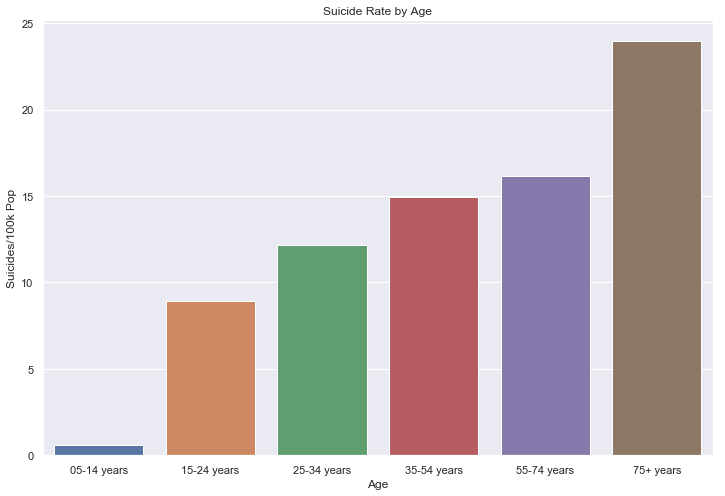

In [117]:
#srate_byage = data_byage.sort_values(axis=0)
plt.figure(figsize=(12,8))
sns.barplot(x='age group', y='suicides/100k pop', data=srate_byage)
plt.title("Suicide Rate by Age")
plt.xlabel("Age")
plt.ylabel("Suicides/100k Pop")

# Suicide rate by year

In [26]:
data_byyear = data.groupby('year')['suicides/100k pop'].sum()
data_byyear

year
1985     6811.89
1986     6579.84
1987     7545.45
1988     7473.13
1989     8036.54
1990     9878.75
1991    10321.06
1992    10528.88
1993    10790.29
1994    11483.79
1995    14660.26
1996    14142.21
1997    13817.83
1998    14150.72
1999    14473.91
2000    14387.45
2001    14276.21
2002    14227.72
2003    13627.58
2004    12581.80
2005    12164.99
2006    12166.01
2007    12410.15
2008    12145.84
2009    12176.04
2010    11843.99
2011    11367.84
2012    11101.91
2013    10663.64
2014    10306.73
2015     8253.99
2016     2147.39
Name: suicides/100k pop, dtype: float64

In [27]:
# Print graph: 'Suicide Rate by Year'

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.]),
 <a list of 9 Text xticklabel objects>)

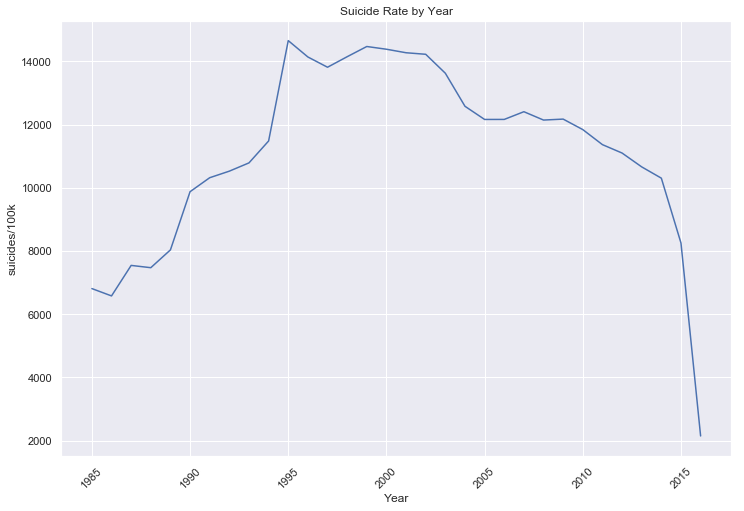

In [28]:
plt.figure(figsize=(12,8))
_ = plt.plot(data_byyear)
plt.title('Suicide Rate by Year')
plt.xlabel('Year')
plt.ylabel('suicides/100k')
plt.xticks(rotation=45)

### First verifying min and max value of year column to confirm for which years data has been collected

In [29]:
data['year'].loc[data['year'].idxmin()]

1985

In [30]:
data['year'].loc[data['year'].idxmax()]

2016

### For how many countries has data been collected each year?

In [31]:
#len(data[(data['year'] == 2015)].country.unique())

In [32]:
years = data.year.unique()
type(years[0])

numpy.int64

In [33]:
#years = [data.year.unique()]
#type(years[0])

In [34]:

df_length = dict()
for y in years:
    unique_year = data[data['year']== y].country.unique()
    df_length[y] = len(unique_year)


In [35]:
years_country = pd.DataFrame(data=df_length, index=[0]).T
years_country.sort_index(inplace=True)
years_country
# years_country.reset_index().sort_values('index')

,0
1985,48
1986,48
1987,54
1988,49
1989,52
1990,64
1991,64
1992,65
1993,65
1994,68


Text(0, 0.5, 'Number of Countries')

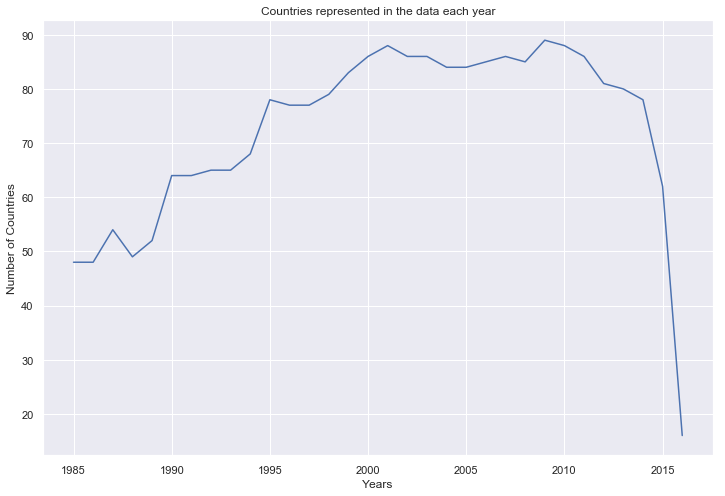

In [36]:
plt.figure(figsize=(12,8))
_ = plt.plot(years_country)
plt.title("Countries represented in the data each year")
plt.xlabel("Years")
plt.ylabel("Number of Countries")

Text(0.5, 0.98, 'Comparison between Suicide Rate per Year and Amount of Countries Investigated per Year')

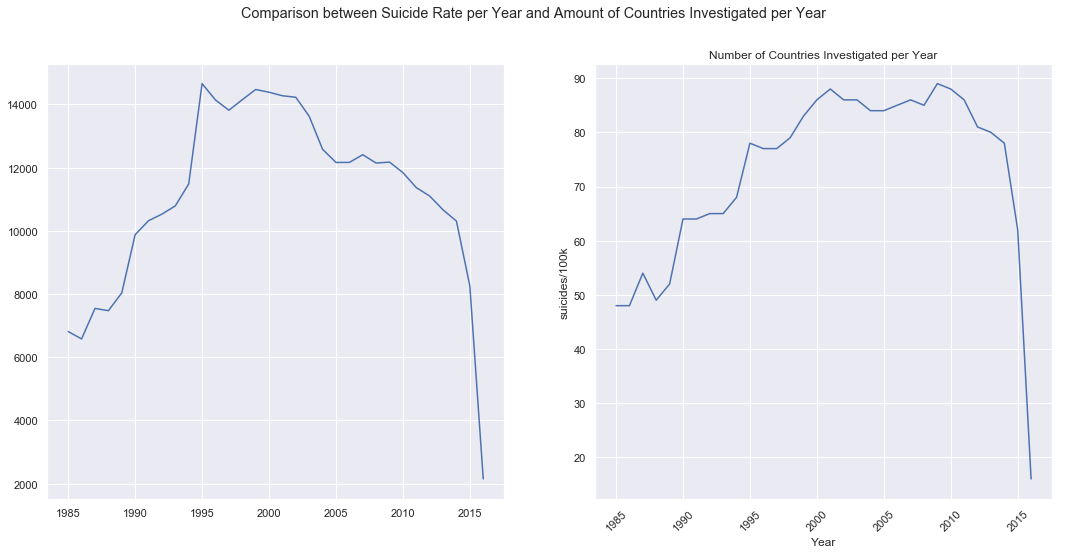

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True)
axs[0].plot(data_byyear)
axs[1].plot(years_country)
plt.title('Mean Suicide Rate by Year')
plt.title('Number of Countries Investigated per Year')
plt.xlabel('Year')
plt.ylabel('suicides/100k')
plt.xticks(rotation=45)
fig.suptitle('Comparison between Suicide Rate per Year and Amount of Countries Investigated per Year')


### Checking which countries are represented in how many years (total: 32 years)

In [39]:
# data[data['country'] == 'Albania'].year.unique()
country = data.country.unique()

df_country = dict()

for c in country:
    unique_country = data[data['country'] == c].year.unique()
    df_country[c] = len(unique_country)

country_year = pd.DataFrame(data=df_country, index=[1]).T
country_year

,1
Albania,22
Antigua and Barbuda,27
Argentina,31
Armenia,25
Aruba,14
Australia,30
Austria,32
Azerbaijan,16
Bahamas,23
Bahrain,21


Text(0, 0.5, 'Number of Countries')

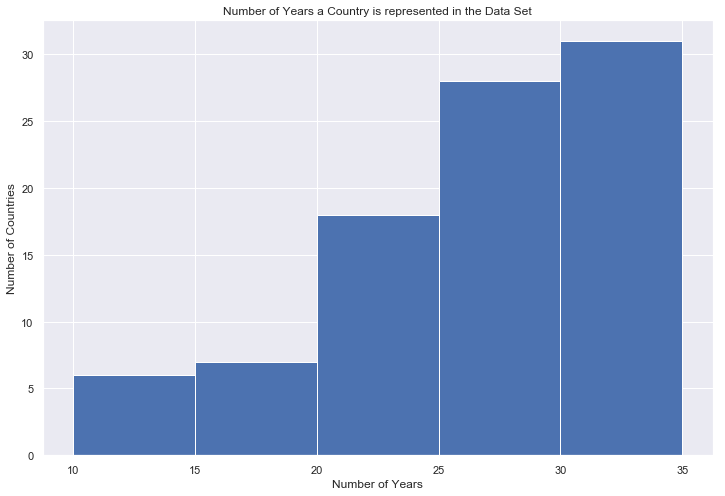

In [40]:

plt.figure(figsize=(12,8))
country_year.reset_index().sort_values('index')
bin_range = [10, 15, 20, 25, 30, 35]
_ = plt.hist(country_year[1], bins= bin_range)
plt.title("Number of Years a Country is represented in the Data Set")
plt.xlabel("Number of Years")
plt.ylabel("Number of Countries")

# Filtering the data by countries (> 20 years) and years (1990 - 2015)

## First filtering by countries

### Extracting countries that are represented in 20 or more years

In [41]:
country_20 = country_year[country_year > 20]
country_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, Albania to Uzbekistan
Data columns (total 1 columns):
1    76 non-null float64
dtypes: float64(1)
memory usage: 1.6+ KB


In [42]:
country_20 = country_20.dropna()
country_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, Albania to Uzbekistan
Data columns (total 1 columns):
1    76 non-null float64
dtypes: float64(1)
memory usage: 1.2+ KB


In [43]:
country_20

,1
Albania,22.0
Antigua and Barbuda,27.0
Argentina,31.0
Armenia,25.0
Australia,30.0
Austria,32.0
Bahamas,23.0
Bahrain,21.0
Barbados,25.0
Belarus,21.0


### Creating a list of the countries that are represented in 20 or more years

In [44]:
country_20 = country_20.reset_index().sort_values('index')
country_20 = country_20['index'].tolist()
country_20

['Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Mauritius',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Panama',
 'Paraguay',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saint Lucia',
 'Saint Vincent and Grenadines',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Trinidad and Tobago',
 'Turkmenistan',
 'Ukraine',
 'United Kingdom',
 'United 

### Taking these countries from the data

In [45]:
df_filtered = pd.DataFrame()

for c in country_20:
    filtered_bycountry = data[(data['country'] == c)]
    df_filtered = df_filtered.append(filtered_bycountry) 

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25006 entries, 0 to 27819
Data columns (total 12 columns):
country               25006 non-null object
year                  25006 non-null int64
sex                   25006 non-null object
age                   25006 non-null object
suicides_no           25006 non-null int64
population            25006 non-null int64
suicides/100k pop     25006 non-null float64
country-year          25006 non-null object
HDI for year          7512 non-null float64
 gdp_for_year ($)     25006 non-null object
gdp_per_capita ($)    25006 non-null int64
generation            25006 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [46]:
df_filtered.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [47]:
df_filtered.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


## Second: Filtering by the years 1990 - 2015

In [48]:
df_filtered2 = df_filtered[(df_filtered['year'] > 1990) & (df_filtered['year'] < 2016)]
#df[(df['Date'] > '2014-06-05') & (df['Date'] < '2015-06-11')]
df_filtered2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
36,Albania,1992,male,35-54 years,12,343800,3.49,Albania1992,NaN,"709,452,584",251,Boomers
37,Albania,1992,male,15-24 years,9,263700,3.41,Albania1992,NaN,"709,452,584",251,Generation X
38,Albania,1992,male,55-74 years,5,159500,3.13,Albania1992,NaN,"709,452,584",251,Silent
39,Albania,1992,male,25-34 years,7,245500,2.85,Albania1992,NaN,"709,452,584",251,Boomers
40,Albania,1992,female,15-24 years,7,292400,2.39,Albania1992,NaN,"709,452,584",251,Generation X


In [49]:
df_filtered2.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [50]:
suicides_percountry = df_filtered2.groupby(['country', 'year'])['suicides/100k pop'].mean()

#### Checking how many missing values are still in the data

In [51]:
suicides_percountry = suicides_percountry.replace(0.0, np.nan)
suicides_percountry.isnull().sum().sum()

39

#### Replacing NaNs

In [52]:
suicides_percountry.fillna(method='ffill',inplace=True)
suicides_percountry.isnull().sum().sum()

0

In [53]:
suicides_percountry

country              year
Albania              1992     1.500000
                     1993     2.713333
                     1994     2.681667
                     1995     3.379167
                     1996     3.635000
                     1997     6.452500
                     1998     5.543333
                     1999     5.817500
                     2000     2.558333
                     2001     4.218333
                     2002     5.209167
                     2003     4.883333
                     2004     5.449167
                     2005     5.449167
                     2006     5.449167
                     2007     5.487500
                     2008     5.920833
                     2009     5.920833
                     2010     3.471667
Antigua and Barbuda  1991     3.471667
                     1992     3.471667
                     1993     1.250000
                     1994     1.250000
                     1995     1.250000
                     1998     1.250000

# Top 10 Countries With the Highest Numbers of Suicides

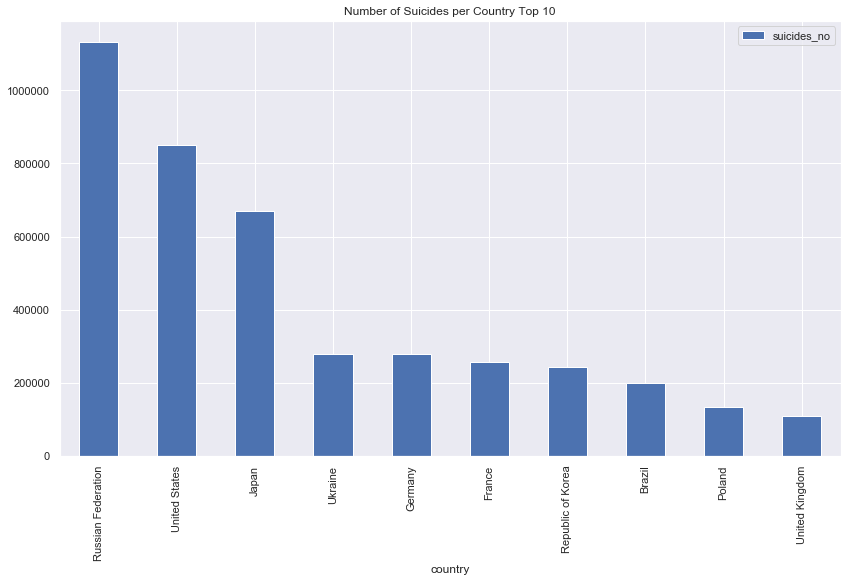

In [54]:
suicide_num_percountry = df_filtered2.groupby('country')['suicides_no'].sum().to_frame().sort_values(by='suicides_no', ascending=False)
suicide_num_percountry[:10].plot(kind='bar',figsize=(14,8),title='Number of Suicides per Country Top 10')


# Top 10 countries with the highest suicide rate

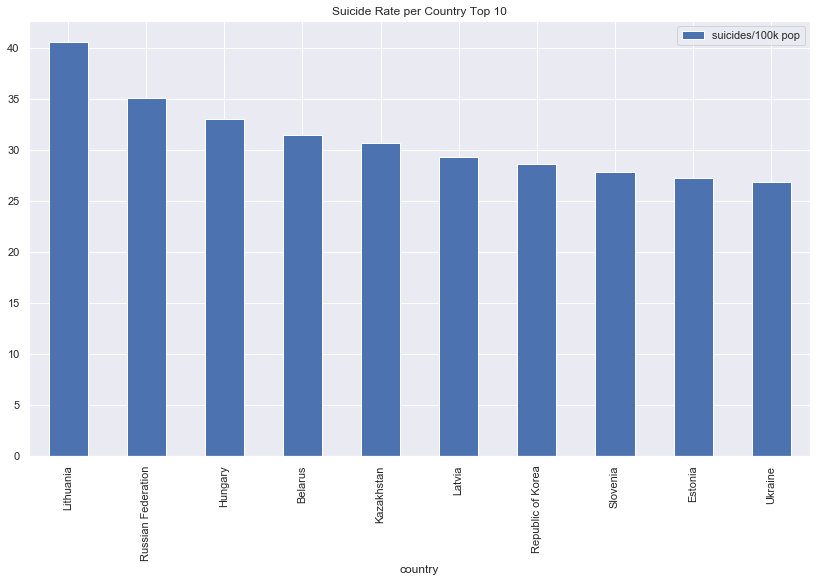

In [55]:
suicides_percountry2 = df_filtered2.groupby('country')['suicides/100k pop'].mean().to_frame().sort_values(by='suicides/100k pop', ascending=False)
suicides_percountry2[:10].plot(kind='bar',figsize=(14,8),title='Suicide Rate per Country Top 10')


# Countries with the lowest numbers of suicides

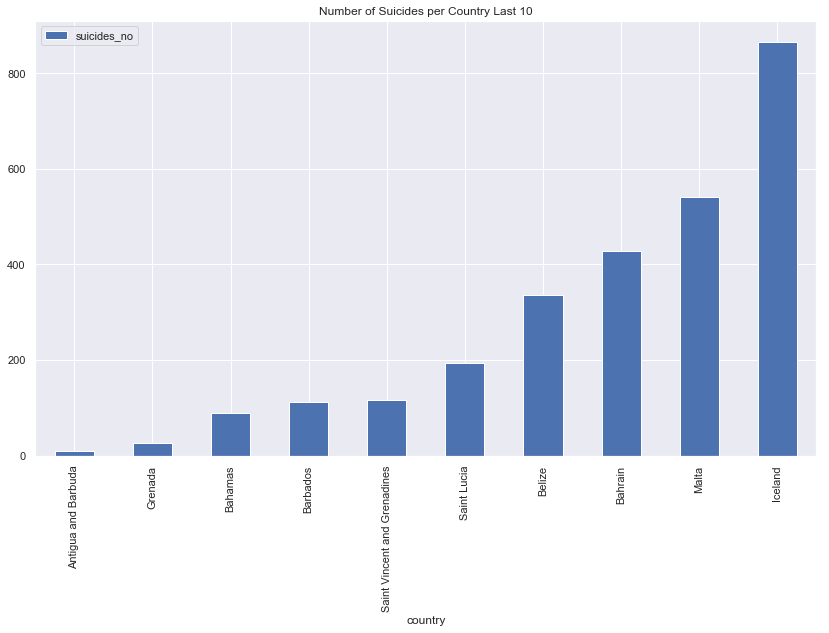

In [56]:
suicide_num_percountry2 = df_filtered2.groupby('country')['suicides_no'].sum().to_frame().sort_values(by='suicides_no')
suicide_num_percountry2[:10].plot(kind='bar',figsize=(14,8),title='Number of Suicides per Country Last 10')


# 10 Countries with the lowest Suicide Rate

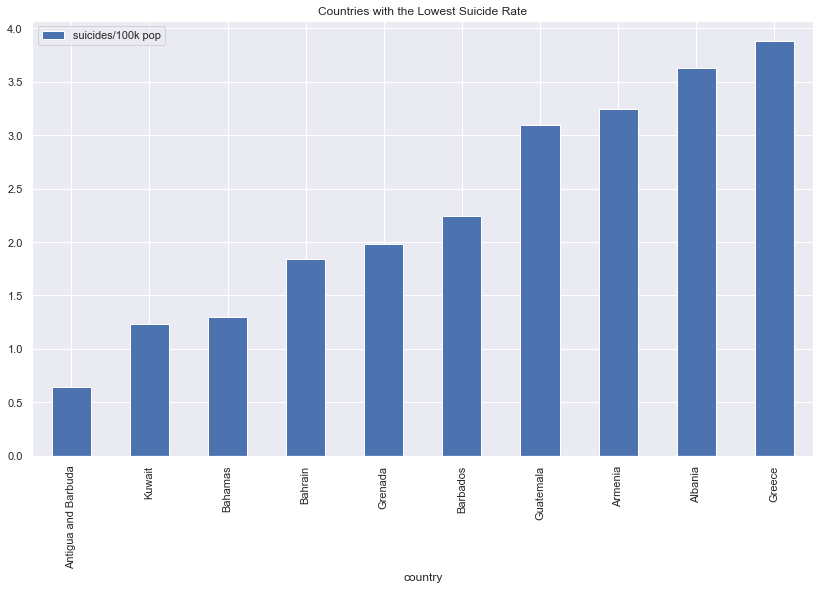

In [57]:
suicides_percountry3 = df_filtered2.groupby('country')['suicides/100k pop'].mean().to_frame().sort_values(by='suicides/100k pop')
suicides_percountry3[:10].plot(kind='bar',figsize=(14,8),title='Countries with the Lowest Suicide Rate')


## Top 10 Countries: Suicide Rate by Age

### Extracting Top 10 Countries

In [58]:
Top10 = ['Lithuania', 'Russian Federation', 'Hungary', 'Belarus', 'Kazakhstan', 'Latvia', 'Republic of Korea', 'Slovenia', 'Estonia', 'Ukraine']

df_top10 = pd.DataFrame()

for c in Top10:
    filtered_bysuicide = df_filtered2[(df_filtered2['country'] == c)]
    df_top10 = df_top10.append(filtered_bysuicide) 


df_top10


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
15044,Lithuania,1995,male,35-54 years,632,436306,144.85,Lithuania1995,0.701,"7,870,782,261",2324,Boomers
15045,Lithuania,1995,male,75+ years,67,47214,141.91,Lithuania1995,0.701,"7,870,782,261",2324,G.I. Generation
15046,Lithuania,1995,male,55-74 years,325,274196,118.53,Lithuania1995,0.701,"7,870,782,261",2324,Silent
15047,Lithuania,1995,male,25-34 years,226,284758,79.37,Lithuania1995,0.701,"7,870,782,261",2324,Generation X
15048,Lithuania,1995,male,15-24 years,134,263792,50.80,Lithuania1995,0.701,"7,870,782,261",2324,Generation X
15049,Lithuania,1995,female,75+ years,37,109609,33.76,Lithuania1995,0.701,"7,870,782,261",2324,G.I. Generation
15050,Lithuania,1995,female,55-74 years,101,408926,24.70,Lithuania1995,0.701,"7,870,782,261",2324,Silent
15051,Lithuania,1995,female,35-54 years,113,481445,23.47,Lithuania1995,0.701,"7,870,782,261",2324,Boomers
15052,Lithuania,1995,female,25-34 years,33,276055,11.95,Lithuania1995,0.701,"7,870,782,261",2324,Generation X
15053,Lithuania,1995,female,15-24 years,20,256623,7.79,Lithuania1995,0.701,"7,870,782,261",2324,Generation X


In [59]:
top10_age = df_top10.groupby(['country', 'age'])['suicides/100k pop'].mean().reset_index()



Text(0, 0.5, 'Suicide Rate')

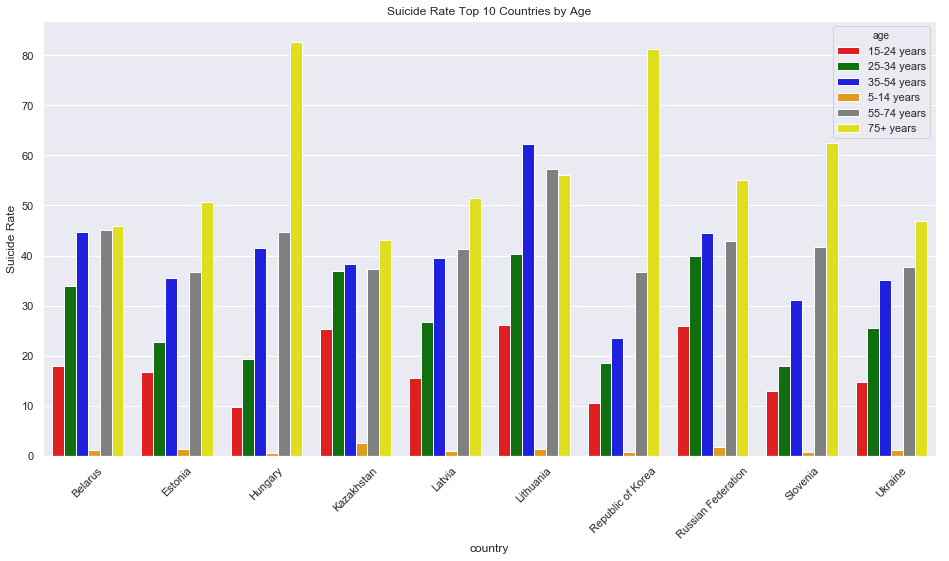

In [60]:
color=['red','green','blue','orange','gray','yellow']
plt.figure(figsize=(16,8))
sns.barplot(x='country',y='suicides/100k pop',hue='age',data=top10_age, palette=color)
plt.title("Suicide Rate Top 10 Countries by Age")
plt.xticks(rotation=45)
plt.ylabel("Suicide Rate")

## Which country had the highest suicide rate in which year?

In [61]:
suicides_percountry.idxmax()

('Lithuania', 1995)

In [63]:
suicides_percountry.max()

53.275

# Connection between suicide rate and gdp_per_capita

## Creating df with gdp_per_capita ($) for each country in each year

In [66]:
gdp = df_filtered2[['country', 'year', 'gdp_per_capita ($)']]

### Merging Dataframes

In [67]:
gdp.set_index('country')
df_percountry = suicides_percountry.to_frame()
#df_percountry.reset_index(level='year', inplace=True)
df_gdp = gdp.groupby(['country', 'year'])['gdp_per_capita ($)'].mean().reset_index()
#df_gpd = df_gdp.to_frame()
#df_gpd.reset_index(level='year', inplace=True)

gpd_suicide = df_gdp.merge(df_percountry, on='country')

#gpd_suicide



### Linear Regression

In [68]:
gpd_suicide.corr() 

,year,gdp_per_capita ($),suicides/100k pop
year,1.000000,0.313781,0.014849
gdp_per_capita ($),0.313781,1.000000,0.030923
suicides/100k pop,0.014849,0.030923,1.000000


# Correlation between suicide rate and HDI

## Creating df with HDI for year for each country in each year

In [69]:
hdi = df_filtered2[['country', 'year', 'HDI for year']] 

### Merging Dataframes on country

In [70]:
hdi.set_index('country')
df_hdi = hdi.groupby(['country', 'year'])['HDI for year'].mean().reset_index()

hdi_suicide = df_hdi.merge(df_percountry, on='country')

#hdi_suicide

In [71]:
hdi_suicide.corr()

,year,HDI for year,suicides/100k pop
year,1.000000,0.285087,0.014849
HDI for year,0.285087,1.000000,0.189695
suicides/100k pop,0.014849,0.189695,1.000000


# Suicide rate by country

In [72]:
usa = data[(data['country'] == 'United States')]

In [73]:
usa_byyear = usa.groupby('year')['suicides/100k pop'].mean()

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.]),
 <a list of 9 Text xticklabel objects>)

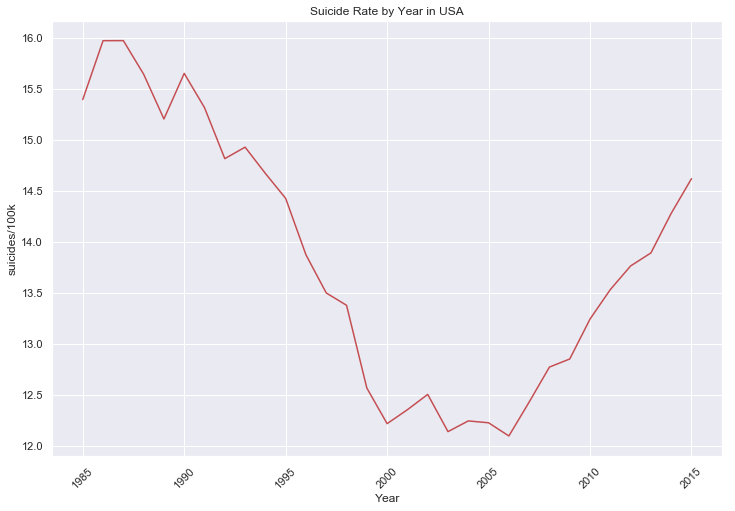

In [75]:
plt.figure(figsize=(12,8))
_ = plt.plot(usa_byyear, color='r')
plt.title('Suicide Rate by Year in USA')
plt.xlabel('Year')
plt.ylabel('suicides/100k')
plt.xticks(rotation=45)

## Difference between suicide rate in USA compared to suicide rate in world

In [76]:
data3 = df_filtered2[(df_filtered2['country'] != 'United States')]
mean_suicide_world = data3.groupby('year')['suicides/100k pop'].mean()

In [77]:
usa_tocompare = df_filtered2[(df_filtered2['country'] == 'United States')]
mean_suicide_usa = usa_tocompare.groupby('year')['suicides/100k pop'].mean()

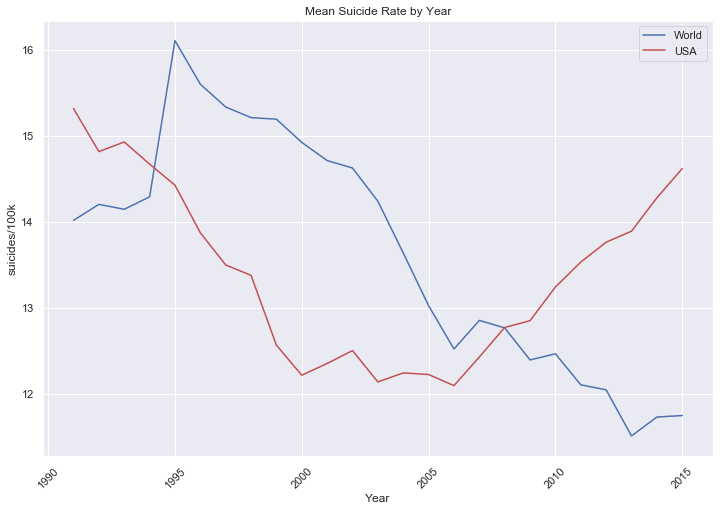

In [78]:
plt.figure(figsize=(12,8))
_ = plt.plot(mean_suicide_world, color='b', label = 'World')
_ = plt.plot(mean_suicide_usa, color='r', label = 'USA')
plt.title('Mean Suicide Rate by Year')
plt.xlabel('Year')
plt.ylabel('suicides/100k')
plt.xticks(rotation=45)
plt.legend()

# Differences in Suicide Rate Between Countries

#### Taking Russia out of the data set => data4

In [79]:
data4= data3[(data3['country'] != 'Russian Federation')]
suicide_world_tocompare = data4.groupby('year')['suicides/100k pop'].mean()

In [80]:
russia = df_filtered2[(df_filtered2['country'] == 'Russian Federation')]
mean_suicide_russia = russia.groupby('year')['suicides/100k pop'].mean()

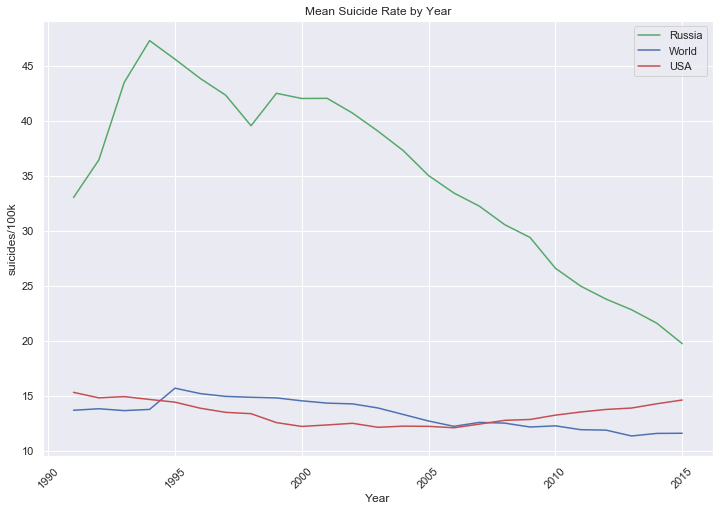

In [82]:
plt.figure(figsize=(12,8))
_ = plt.plot(mean_suicide_russia, color='g', label='Russia')
_ = plt.plot(suicide_world_tocompare, color='b', label = 'World')
_ = plt.plot(mean_suicide_usa, color='r', label = 'USA')
plt.title('Mean Suicide Rate by Year')
plt.xlabel('Year')
plt.ylabel('suicides/100k')
plt.xticks(rotation=45)
plt.legend()

#### Taking Israel out of the world data set => data5

In [84]:
data5= data3[(data3['country'] != 'Russian Federation')]
suicide_world_tocompare_2 = data5.groupby('year')['suicides/100k pop'].mean()

In [85]:
israel = df_filtered2[(df_filtered2['country'] == 'Israel')]
mean_suicide_israel = israel.groupby('year')['suicides/100k pop'].mean()

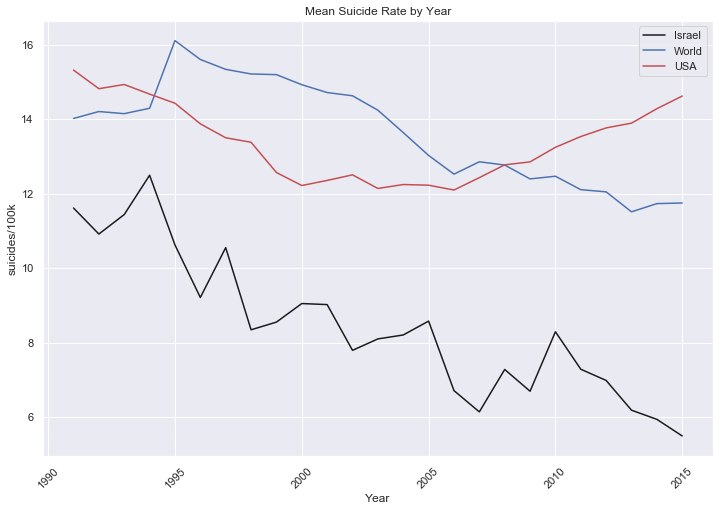

In [86]:
plt.figure(figsize=(12,8))
_ = plt.plot(mean_suicide_israel, color='k', label='Israel')
_ = plt.plot(mean_suicide_world, color='b', label = 'World')
_ = plt.plot(mean_suicide_usa, color='r', label = 'USA')
plt.title('Mean Suicide Rate by Year')
plt.xlabel('Year')
plt.ylabel('suicides/100k')
plt.xticks(rotation=45)
plt.legend()

# Suicide Rate by Gender

In [87]:
sex = df_filtered2.groupby(['sex', 'year'])['suicides/100k pop'].mean()
sex = sex.unstack(level=0)
sex

sex,female,male
year,,
1991,6.326500,21.746806
1992,6.525137,21.897022
1993,6.205054,22.108333
1994,6.254821,22.333923
1995,6.762838,25.401036
1996,6.351347,24.797717
1997,6.136296,24.479190
1998,6.169018,24.200046
1999,6.108604,24.202703


(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.]),
 <a list of 8 Text xticklabel objects>)

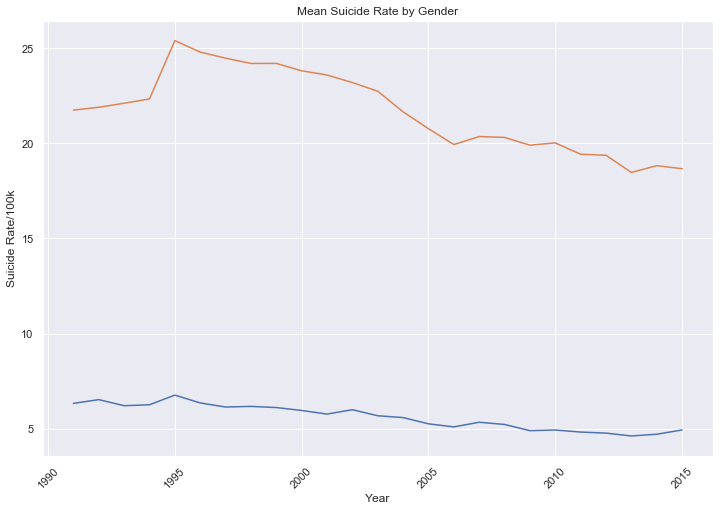

In [89]:
plt.figure(figsize=(12,8))
_ = plt.plot(sex)
plt.title('Mean Suicide Rate by Gender')
plt.xlabel('Year')
plt.ylabel('Suicide Rate/100k')
plt.xticks(rotation=45)

### Normalize df so that each row sums to 1 to make a stacked bar plot

In [90]:
 sex_pct = sex.div(sex.sum(1).astype(float), axis=0)

<Figure size 864x576 with 0 Axes>

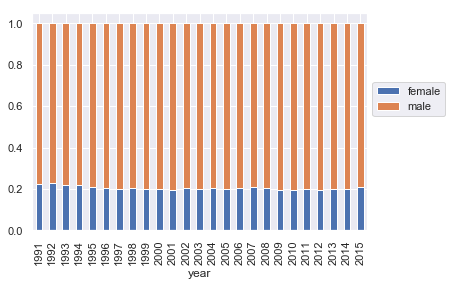

In [100]:
plt.figure(figsize=(12,8))
sex_pct.plot(kind='bar', stacked=True)
plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0.5))

In [94]:
generation = df_filtered2.groupby(['generation', 'year'])['suicides/100k pop'].mean()
generation = generation.unstack(level=0)
generation 

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
year,,,,,,
1991,14.162792,28.394083,9.793167,NaN,0.605000,17.102083
1992,14.905984,27.499098,9.487295,NaN,0.621066,17.847049
1993,15.011371,27.371210,9.216774,NaN,0.643790,17.685645
1994,14.521269,28.953769,9.382692,NaN,0.573846,17.813385
1995,19.492770,30.256284,12.979831,NaN,0.635878,20.147027
1996,18.804863,28.940205,12.480342,NaN,0.621986,20.119452
1997,18.136875,28.691458,12.452118,NaN,0.650486,19.463403
1998,18.359658,27.724726,12.378733,NaN,0.681507,19.583836
1999,18.314662,26.862703,12.904527,NaN,0.697635,19.249865


In [95]:
generation_pct = generation.div(generation.sum(1).astype(float), axis=0)

<Figure size 864x576 with 0 Axes>

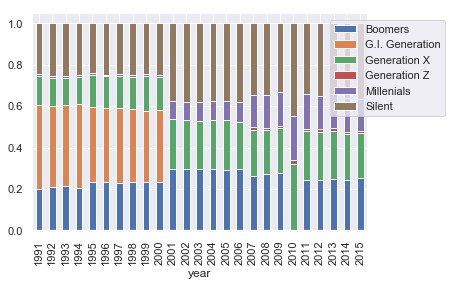

In [101]:
plt.figure(figsize=(12,8))
generation_pct.plot(kind='bar', stacked=True)
plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0.5))

In [102]:
age = df_filtered2.groupby(['age', 'year'])['suicides/100k pop'].mean()
age = age.unstack(level=0)
#age

In [103]:
age_pct = age.div(age.sum(1).astype(float), axis=0)
#age_pct

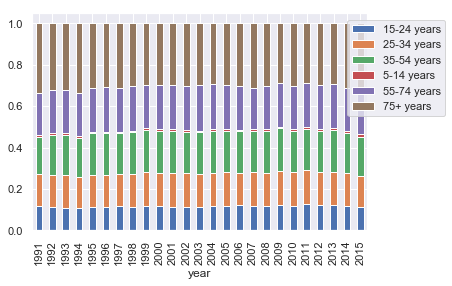

In [104]:
age_pct.plot(kind='bar', stacked=True)
plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0.5))